#PREDIKSI STROKE DENGAN ALGORITMA RANDOM FOREST

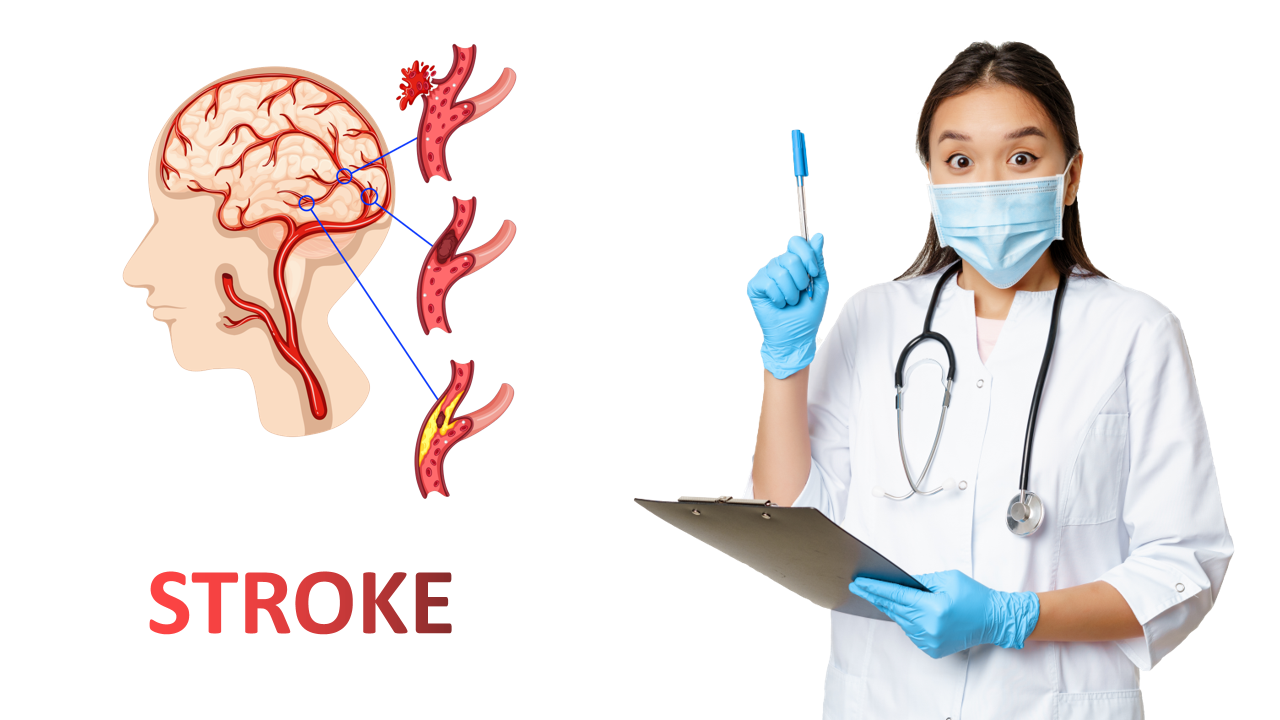

Dalam upaya untuk mengatasi masalah kesehatan yang signifikan, akan dibuat sebuah model algoritma klasifikasi untuk memprediksi kemungkinan seorang pasien mengalami stroke. Menurut Organisasi Kesehatan Dunia (WHO), stroke merupakan penyebab kematian kedua terbanyak secara global, dengan tanggung jawab atas sekitar 11% dari total kematian. Dengan memanfaatkan dataset yang relevan dan menggunakan teknik-teknik machine learning, model ini diharapkan mampu memberikan prediksi yang akurat dan bermanfaat bagi upaya pencegahan serta penanganan dini stroke.

Disini akan dibuatkan model prediksi dengan menggunakan Algoritma Random Forest dan dengan memanfaatkan Hyperparameter tuning untuk mencari akurasi model yang terbaik

##Understanding Data

Data yang digunakan bersumber dari Kaggle dataset dimana data ini memiliki 11 kolom dan 5110 baris,
berikut penjelasan dari masing masing kolom :
1. id: ID pasien
2. gender: "Laki-laki", "Perempuan", atau "Lainnya"
3. age: usia pasien
4. hypertension: 0 jika pasien tidak menderita hipertensi, 1 jika pasien menderita hipertensi
5. heart_disease: 0 jika pasien tidak memiliki penyakit jantung, 1 jika pasien memiliki penyakit jantung
6. ever_married: "Tidak" atau "Ya"
7. work_type: "Anak-anak", "Pekerjaan Pemerintah", "Belum Pernah Bekerja", "Swasta", atau "Wiraswasta"
8. Residence_type: "Pedesaan" atau "Perkotaan"
9. avg_glucose_level: rata-rata kadar glukosa dalam darah
10. bmi: indeks massa tubuh
11. smoking_status: "pernah merokok", "tidak pernah merokok", "merokok", atau "Tidak Diketahui"*
12. stroke: 1 jika pasien pernah mengalami stroke atau 0 jika tidak

##Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score, precision_score, recall_score

##Load Data

In [2]:
!mkdir ~/.kaggle

In [3]:
!cp '/content/kaggle.json' ~/.kaggle

cp: cannot stat '/content/kaggle.json': No such file or directory


In [4]:
!kaggle datasets download -d fedesoriano/stroke-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
License(s): copyright-authors
  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 54.2MB/s]


In [5]:
!unzip /content/stroke-prediction-dataset.zip

Archive:  /content/stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [6]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
df = df.drop(columns = ['id'])

In [8]:
df.shape

(5110, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


##Exploratory Data Analysis

In [10]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
bmi_null = df[df['bmi'].isnull()]
bmi_null

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [12]:
df = df.dropna()

In [13]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [16]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [17]:
df.shape

(4909, 11)

In [18]:
encode = LabelEncoder()
def encode_data (df) :
  df['gender'] = encode.fit_transform(df['gender'])
  df['ever_married'] = encode.fit_transform(df['ever_married'])
  df['work_type'] = encode.fit_transform(df['work_type'])
  df['Residence_type'] = encode.fit_transform(df['Residence_type'])
  df['smoking_status'] = encode.fit_transform(df['smoking_status'])

  return df

df = encode_data(df)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   int64  
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   int64  
 5   work_type          4909 non-null   int64  
 6   Residence_type     4909 non-null   int64  
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   int64  
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 460.2 KB


In [20]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.410063,42.865374,0.091872,0.049501,0.652679,2.170096,0.507232,105.305150,28.893237,1.375433,0.042575
std,0.492309,22.555115,0.288875,0.216934,0.476167,1.092593,0.499999,44.424341,7.854067,1.067322,0.201917
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.070000,23.500000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.680000,28.100000,2.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,113.570000,33.100000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [21]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,1,81.0,0,0,1,2,1,186.21,29.0,1,1


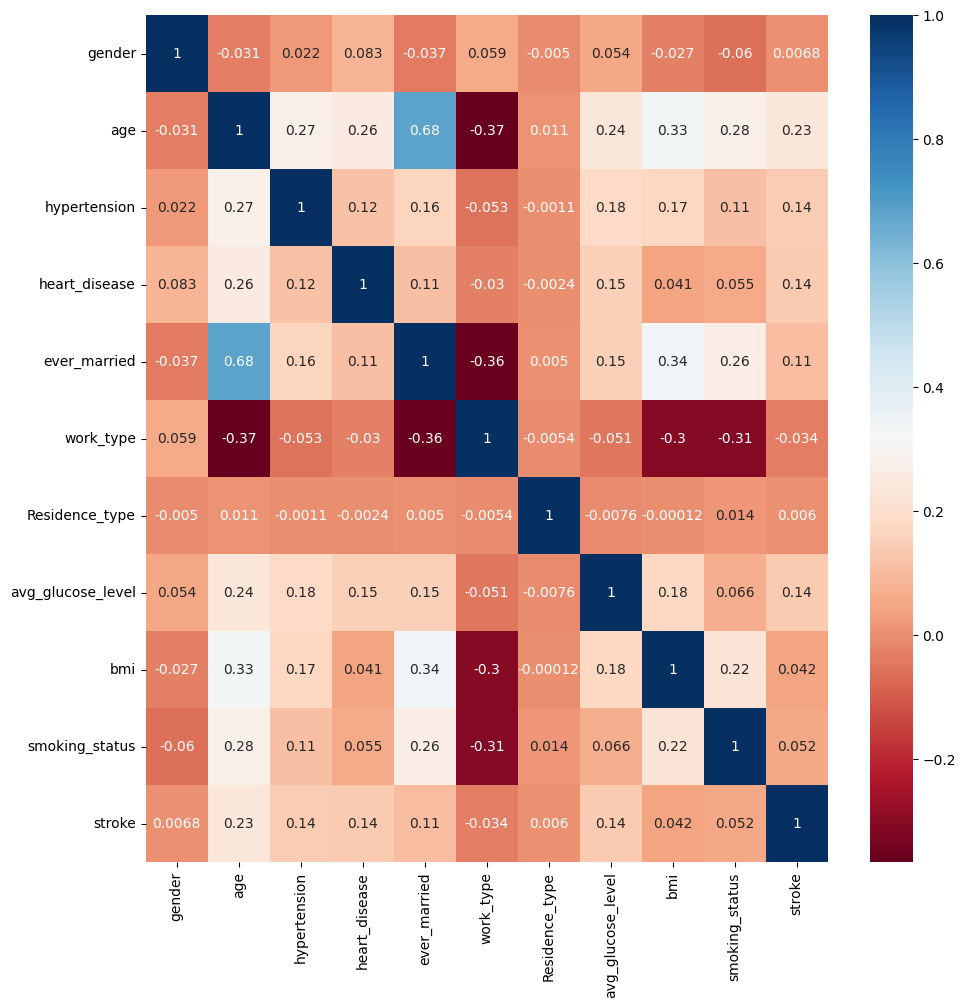

In [22]:
corelation = df.corr()
plt.figure(figsize = (11,11))
sns.heatmap(corelation, cmap ='RdBu', annot = True )
plt.show()

##Split Data

In [23]:
x = df.drop(columns=['stroke'], axis=1)
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1


In [24]:
y = df['stroke']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [26]:
x_train.shape

(3436, 10)

In [27]:
x_test.shape

(1473, 10)

In [28]:
y_train.shape

(3436,)

In [29]:
y_test.shape

(1473,)

##Scaling Data

In [30]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

##Random Forest

In [31]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [32]:
prediction_rf = rf.predict(x_train)
accuracy_rf = accuracy_score(y_train, prediction_rf)
print(f"Random Forest Train Accuracy: {accuracy_rf}")
predictions_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, predictions_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf}")

Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.9517990495587237


###Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf, x_train, y_train, cv = k_fold)


print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.96075581 0.9650655  0.94759825 0.95924309 0.95778748]
Mean Accuracy: 0.9580900274195188
Standard Deviation: 0.0057838061583577495


###Hyper Parameter Tuning

####Manual Search

In [34]:
rf_ms = RandomForestClassifier(n_estimators=300, min_samples_leaf=10, random_state=10)
rf_ms.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=10, n_estimators=300, random_state=10)

In [35]:
prediction_rf_ms = rf_ms.predict(x_train)
accuracy_rf_ms = accuracy_score(y_train, prediction_rf_ms)
print(f"Random Forest Train Accuracy: {accuracy_rf_ms}")
predictions_rf_ms = rf_ms.predict(x_test)
accuracy_rf_ms = accuracy_score(y_test, predictions_rf_ms)
print(f"Random Forest Test Accuracy: {accuracy_rf_ms}")

Random Forest Train Accuracy: 0.960128055878929
Random Forest Test Accuracy: 0.9511201629327902


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_ms, x_train, y_train, cv = k_fold)


print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.96511628 0.96652111 0.95050946 0.96069869 0.95778748]
Mean Accuracy: 0.9601266037033277
Standard Deviation: 0.0057284329917954785


####Random Search

In [37]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num = 5)]
max_depth = [int(x) for x in np.linspace(10, 1000, 5)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_search_params = {'n_estimators': n_estimators,
                        'max_depth':max_depth,
                        'min_samples_split':min_samples_split,
                        'min_samples_leaf':min_samples_leaf}
random_search_params

{'n_estimators': [200, 650, 1100, 1550, 2000],
 'max_depth': [10, 257, 505, 752, 1000],
 'min_samples_split': [2, 5, 10, 14],
 'min_samples_leaf': [1, 2, 4, 6, 8]}

In [38]:
rf_randomcv = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                 param_distributions=random_search_params,
                                 n_iter=20,
                                 cv=5,
                                 random_state=46,
                                 n_jobs=-1, #parallel processing
                                 scoring='f1',
                                 verbose=3)
rf_randomcv.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 257, 505, 752, 1000],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 650, 1100, 1550,
                                                         2000]},
                   random_state=46, scoring='f1', verbose=3)

In [39]:
rf_randomcv.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_depth': 505}

In [40]:
rf_randomcv_best = rf_randomcv.best_estimator_

In [41]:
rf_randomcv_best

RandomForestClassifier(max_depth=505, min_samples_leaf=2, n_estimators=2000)

In [42]:
prediction_rf_rcv = rf_randomcv_best.predict(x_train)
accuracy_rf_rcv = accuracy_score(y_train, prediction_rf_rcv)
print(f"Random Forest Train Accuracy: {accuracy_rf_rcv}")
predictions_rf_rcv = rf_randomcv_best.predict(x_test)
accuracy_rf_rcv = accuracy_score(y_test, predictions_rf_rcv)
print(f"Random Forest Test Accuracy: {accuracy_rf_rcv}")

Random Forest Train Accuracy: 0.9685681024447031
Random Forest Test Accuracy: 0.9511201629327902


In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_randomcv_best, x_train, y_train, cv = k_fold)


print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.96511628 0.9650655  0.95050946 0.96069869 0.95778748]
Mean Accuracy: 0.9598354828881893
Standard Deviation: 0.0054250165220613876


####Grid Search

In [44]:
from sklearn.model_selection import GridSearchCV

grid_search_params = {
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 100,
                     rf_randomcv.best_params_['n_estimators'] - 50,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 50,
                     rf_randomcv.best_params_['n_estimators'] + 100],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'],
                          rf_randomcv.best_params_['min_samples_split'] + 1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf'] + 2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
}

grid_search_params

{'n_estimators': [1900, 1950, 2000, 2050, 2100],
 'max_depth': [505],
 'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [2, 4, 6]}

In [45]:
rf_gridcv = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=grid_search_params,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='f1')

rf_gridcv.fit(x_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [505], 'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [1900, 1950, 2000, 2050, 2100]},
             scoring='f1', verbose=2)

In [46]:
rf_gridcv.best_params_

{'max_depth': 505,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 1900}

In [47]:
rf_gridcv_best = rf_gridcv.best_estimator_

In [48]:
rf_gridcv_best

RandomForestClassifier(max_depth=505, min_samples_leaf=2, n_estimators=1900)

In [49]:
prediction_rf_gcv = rf_gridcv_best.predict(x_train)
accuracy_rf_gcv = accuracy_score(y_train, prediction_rf_gcv)
print(f"Random Forest Train Accuracy: {accuracy_rf_gcv}")
predictions_rf_gcv = rf_gridcv_best.predict(x_test)
accuracy_rf_gcv = accuracy_score(y_test, predictions_rf_gcv)
print(f"Random Forest Test Accuracy: {accuracy_rf_gcv}")

Random Forest Train Accuracy: 0.9679860302677532
Random Forest Test Accuracy: 0.9511201629327902


In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, cross_val_score

k_fold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_gridcv_best, x_train, y_train, cv = k_fold)


print("Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [0.96511628 0.9650655  0.95050946 0.96069869 0.95778748]
Mean Accuracy: 0.9598354828881893
Standard Deviation: 0.0054250165220613876


###Kesimpulan

*Kesimpulan untuk Random Forest*

berdasarkan mean accuracy
1. Default = 0.9586714227683559
2. Manual Seacrh = 0.9601266037033277
3. Random Search = 0.9598354828881893
4. Grid Search = 0.9598354828881893